In [1]:
import numpy as np

In [2]:
def Conv2d(image,out_channels,kernel_size,stride=1,padding=0):
  #padding
  new_image_size=(image.shape[1])+(2*padding) #image.shape[1]:element개수반환,new_image_size:패딩결과
  img_padded=np.zeros(shape=(3,new_image_size,new_image_size))
  for i in range(3):
    img_padded[i,padding:new_image_size-padding,padding:new_image_size-padding]=image[i] #image가 3차원값이니까 3개반환

	#kernel
  kernel=np.random.uniform(size=(out_channels,3,kernel_size,kernel_size))
 
	#output output_size를 알아낸 뒤 그에 맞는 빈 행렬을 out_channels의 개수 만큼 미리 생성
  output_size=int(((new_image_size-kernel_size)/stride)+1)
  output=np.zeros(shape=(out_channels,output_size,output_size))

  #convolution 2d
  for z in range(0,out_channels,1):  #만들어야하는 output개수(z)(out_channels)
    row=0
    for x in range(0,output_size*stride,stride):  
      col=0
      for y in range(0,output_size*stride,stride):  
        iter=img_padded[:,x:kernel_size+x,y:kernel_size+y]
        convolve=np.sum(iter*kernel[z,:,:,:])  #합성곱
        output[z,row,col]=convolve  #합성곱 결과를 output행렬에 대입
        col+=1
      row+=1
  return output	

In [3]:
def ReLU(x):
  return np.maximum(0,x)

In [4]:
def MaxPooling(image,pooling_size=2,stride=2):
  output_size = int((image.shape[1]-pooling_size)/stride+1)
  output = np.zeros(shape=(image.shape[0],output_size,output_size))
  for z in range(image.shape[0]):
    row=0
    for x in range(0,output_size*stride,stride):
      col=0
      for y in range(0,output_size*stride,stride):
        output[z,row,col] = np.max(image[z,x:pooling_size+x,y:pooling_size+y])
        col += 1
      row += 1
  return output

In [5]:
def Flattening(image):
  output = image.reshape(-1,1)
  return output

In [26]:
def tanh(x):
  return np.tanh(x)

In [7]:
def Forward(image, hiddenlayer=6, output=1):
  w0=np.random.uniform(size=(image.shape[0],hiddenlayer))
  w1=np.random.uniform(size=(hiddenlayer,output))
  b0=np.random.uniform(size=(hiddenlayer,1))
  b1=np.random.uniform(size=(output,1))
  h1=np.dot(w0.T,image)+b0
  h2=tanh(h1)
  o1=np.dot(w1.T,h2)+b1
  o2=tanh(o1)
  
  return o2

In [1]:
def Softmax(x):
  c = np.max(x)
  exp_x = np.exp(x-c)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x
  return y

In [133]:
def AlexNet(image):
  conv_output1=Conv2d(image,out_channels=96,kernel_size=11,stride=4,padding=0)
  relu_output1 = ReLU(conv_output1)
  pooling_layer1=MaxPooling(relu_output1,pooling_size=3,stride=2)

  conv_output2=Conv2d(pooling_layer1,out_channels=256,kernel_size=5,stride=1,padding=2)
  relu_output2 = ReLU(conv_output2)
  pooling_layer2=MaxPooling(relu_output2,pooling_size=3,stride=2)

  conv_output3=Conv2d(pooling_layer2,out_channels=384,kernel_size=3,stride=1,padding=1)
  relu_output3 = ReLU(conv_output3)

  conv_output4=Conv2d(relu_output3,out_channels=384,kernel_size=3,stride=1,padding=1)
  relu_output4 = ReLU(conv_output4)

  conv_output5=Conv2d(relu_output4,out_channels=256,kernel_size=3,stride=1,padding=1)
  relu_output5=ReLU(conv_output5)
  pooling_layer3=MaxPooling(relu_output5,pooling_size=3,stride=2)

  flattening_output1=Flattening(pooling_layer3)
  fully_connected1=Forward(flattening_output1,hiddenlayer=4096,output=4096)
  fully_connected2=Forward(fully_connected1,hiddenlayer=2000,output=1000)

  softmax=Softmax(fully_connected2)

  return softmax

In [131]:
#이미지 출력확인용
def AlexNet(image):
  conv_output1=Conv2d(image,out_channels=96,kernel_size=11,stride=4,padding=0)
  PIL_image = Image.fromarray(conv_output1.astype('uint8'), 'RGB')
  plt.imshow(PIL_image)
  plt.show()
  relu_output1 = ReLU(conv_output1)
  pooling_layer1=MaxPooling(relu_output1,pooling_size=3,stride=2)
  PIL_image = Image.fromarray(pooling_layer1.astype('uint8'), 'RGB')
  plt.imshow(PIL_image)
  plt.show()

  conv_output2=Conv2d(pooling_layer1,out_channels=256,kernel_size=5,stride=1,padding=2)
  PIL_image = Image.fromarray(conv_output2.astype('uint8'), 'RGB')
  plt.imshow(PIL_image)
  plt.show()
  relu_output2 = ReLU(conv_output2)
  pooling_layer2=MaxPooling(relu_output2,pooling_size=3,stride=2)
  PIL_image = Image.fromarray(pooling_layer2.astype('uint8'), 'RGB')
  plt.imshow(PIL_image)
  plt.show()

  conv_output3=Conv2d(pooling_layer2,out_channels=384,kernel_size=3,stride=1,padding=1)
  relu_output3 = ReLU(conv_output3)

  conv_output4=Conv2d(relu_output3,out_channels=384,kernel_size=3,stride=1,padding=1)
  relu_output4 = ReLU(conv_output4)

  conv_output5=Conv2d(relu_output4,out_channels=256,kernel_size=3,stride=1,padding=1)
  relu_output5=ReLU(conv_output5)
  pooling_layer3=MaxPooling(relu_output5,pooling_size=3,stride=2)

  flattening_output1=Flattening(pooling_layer3)
  fully_connected1=Forward(flattening_output1,hiddenlayer=4096,output=4096)
  fully_connected2=Forward(fully_connected1,hiddenlayer=2000,output=1000)

  softmax=Softmax(fully_connected2)

  # return softmax

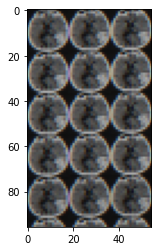

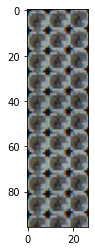

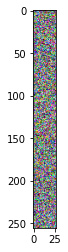

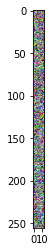

array([[0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [0.001],
       [

In [132]:
#출력확인
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

image = Image.open('008.png')

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image)

AlexNet(image)